## Image Data - Recognising Handwritten Alphabets

## SPRINT 1 - Create DataFrame from raw Image Files

### Importing the libraries

In [58]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from PIL import Image

## Extracting the zip file

In [3]:
%%time
import zipfile
zip_file_path=r"D:\Downloads\mnist.zip"
extract_path = r"D:\Downloads\mnist"

    
# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

CPU times: total: 2min 21s
Wall time: 14h 37min 56s


## Walk through the images folder

In [4]:
file_extensions=[]
for root,dirs,files in os.walk(extract_path):
    print(f"Reading images from {root}, Found {len(files)} files.")
    for file_name in files:
        file_extensions.append(os.path.splitext(file_name)[-1])
        file_path=os.path.join(root, file_name)
print()
print("Total Number of Files:", len(file_extensions))
print("File extension:", set(file_extensions))

Reading images from D:\Downloads\mnist, Found 0 files.
Reading images from D:\Downloads\mnist\New folder, Found 0 files.
Reading images from D:\Downloads\mnist\New folder\A, Found 13870 files.
Reading images from D:\Downloads\mnist\New folder\B, Found 8668 files.
Reading images from D:\Downloads\mnist\New folder\C, Found 23409 files.
Reading images from D:\Downloads\mnist\New folder\D, Found 10134 files.
Reading images from D:\Downloads\mnist\New folder\E, Found 11440 files.
Reading images from D:\Downloads\mnist\New folder\F, Found 1163 files.
Reading images from D:\Downloads\mnist\New folder\G, Found 5762 files.
Reading images from D:\Downloads\mnist\New folder\H, Found 7218 files.
Reading images from D:\Downloads\mnist\New folder\I, Found 1120 files.
Reading images from D:\Downloads\mnist\New folder\J, Found 8493 files.
Reading images from D:\Downloads\mnist\New folder\K, Found 5603 files.
Reading images from D:\Downloads\mnist\New folder\L, Found 11586 files.
Reading images from D:

## Image sizes, extensions and modes

In [8]:
def read_image_files(path):
    images_data = []
    for root,dirs,files in os.walk(extract_path):
        for file_name in files:
            extension = os.path.splitext(file_name)[-1]
            if extension in file_extensions:
                file_path = os.path.join(root, file_name)
                img=Image.open(file_path)
                images_data.append({"FileName": file_name,
                                    "Extension": extension,
                                    "Size": img.size,
                                    "Mode": img.mode,
                                    "Dir": root})
                
    return images_data

def load_into_df(images_data):
    df=pd.DataFrame(images_data)
    return df

In [12]:
images_data=read_image_files(extract_path)

df=load_into_df(images_data)

df.head()

,FileName,Extension,Size,Mode,Dir
0,A-0.png,.png,"(28, 28)",L,D:\Downloads\mnist\New folder\A
1,A-1.png,.png,"(28, 28)",L,D:\Downloads\mnist\New folder\A
2,A-10.png,.png,"(28, 28)",L,D:\Downloads\mnist\New folder\A
3,A-100.png,.png,"(28, 28)",L,D:\Downloads\mnist\New folder\A
4,A-1000.png,.png,"(28, 28)",L,D:\Downloads\mnist\New folder\A


In [13]:

df.to_csv("alphabets.csv")

In [15]:
df.head()

,FileName,Extension,Size,Mode,Dir
0,A-0.png,.png,"(28, 28)",L,D:\Downloads\mnist\New folder\A
1,A-1.png,.png,"(28, 28)",L,D:\Downloads\mnist\New folder\A
2,A-10.png,.png,"(28, 28)",L,D:\Downloads\mnist\New folder\A
3,A-100.png,.png,"(28, 28)",L,D:\Downloads\mnist\New folder\A
4,A-1000.png,.png,"(28, 28)",L,D:\Downloads\mnist\New folder\A


In [16]:
df['Extension'].value_counts()

Extension
.png    372451
Name: count, dtype: int64

In [17]:
df['Size'].value_counts()

Size
(28, 28)    372451
Name: count, dtype: int64

In [18]:
df['Mode'].value_counts()

Mode
L    372451
Name: count, dtype: int64

In [19]:
df['Dir'].value_counts()

Dir
D:\Downloads\mnist\New folder\O    57825
D:\Downloads\mnist\New folder\S    48419
D:\Downloads\mnist\New folder\U    29008
D:\Downloads\mnist\New folder\C    23409
D:\Downloads\mnist\New folder\T    22495
D:\Downloads\mnist\New folder\P    19341
D:\Downloads\mnist\New folder\N    19010
D:\Downloads\mnist\New folder\A    13870
D:\Downloads\mnist\New folder\M    12336
D:\Downloads\mnist\New folder\L    11586
D:\Downloads\mnist\New folder\R    11566
D:\Downloads\mnist\New folder\E    11440
D:\Downloads\mnist\New folder\Y    10859
D:\Downloads\mnist\New folder\W    10784
D:\Downloads\mnist\New folder\D    10134
D:\Downloads\mnist\New folder\B     8668
D:\Downloads\mnist\New folder\J     8493
D:\Downloads\mnist\New folder\H     7218
D:\Downloads\mnist\New folder\X     6272
D:\Downloads\mnist\New folder\Z     6076
D:\Downloads\mnist\New folder\Q     5812
D:\Downloads\mnist\New folder\G     5762
D:\Downloads\mnist\New folder\K     5603
D:\Downloads\mnist\New folder\V     4182
D:\Downloads

## Create a Data Frame

In [27]:
path=r"D:\Downloads\mnist\New folder"

In [28]:
def vectorize_image_files(path):
    image_vectors = []
    image_labels=[]
    labels=[dir_name for dir_name in os.listdir(path) if os.path.isdir(os.path.join(path,dir_name))]
    for label in labels:
        i=0
        label_dir = os.path.join(path,label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                i=i+1
                image_file_path=os.path.join(label_dir, image_file)
                with Image.open(image_file_path) as img:
                    # vectorize
                    img_arr=np.array(img)
                    image_vector=img_arr.ravel()
                    image_vectors.append(image_vector)
                    image_labels.append(label)
                if i>1000:
                    break
    return image_vectors, image_labels

In [30]:
%%time
image_vectors, image_labels = vectorize_image_files(path)

CPU times: total: 8.55 s
Wall time: 4h 26min 11s


In [31]:
def load_vectors_into_df(image_vectors,image_labels):
    df=pd.DataFrame(image_vectors,columns=[f'pixel_{i}' for i in range(len(image_vectors[0]))])
    df['labels'] = image_labels
    return df

In [32]:
%%time
df=load_vectors_into_df(image_vectors,image_labels)

CPU times: total: 5min 55s
Wall time: 6min 58s


In [33]:
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


## Step 1 - Load the data

In [53]:
df.to_csv("images_data.csv")

In [54]:
images_df=pd.read_csv(r"C:\Users\hp\images_data.csv")

In [55]:
images_df.head()

,Unnamed: 0,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [56]:
images_df.drop(columns='Unnamed: 0', inplace=True)

In [34]:
df.shape

(26026, 785)

In [35]:
df['labels'].value_counts()

labels
A    1001
B    1001
Y    1001
X    1001
W    1001
V    1001
U    1001
T    1001
S    1001
R    1001
Q    1001
P    1001
O    1001
N    1001
M    1001
L    1001
K    1001
J    1001
I    1001
H    1001
G    1001
F    1001
E    1001
D    1001
C    1001
Z    1001
Name: count, dtype: int64

In [36]:
28*28

784

##  Step 2 - Exploratory Data Analysis

## 1. Show me some nice analysis on the given data.

<Axes: xlabel='labels', ylabel='count'>

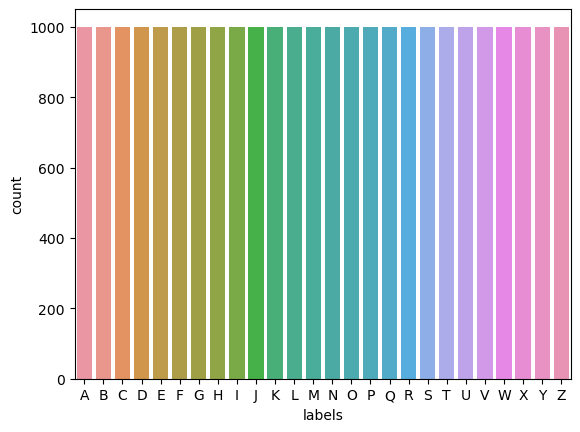

In [37]:
sns.countplot(data=df,x='labels')

Randomly Generated index: 4548
Label of image at 4548 index: E
Data Type of Image Array: object
Image Array:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 55 99 96 16 11 55 17 9 55 55 66 131 180 198 81 0 0 0
  0]
 [0 0 0 0 0 0 0 0 87 213 225 224 188 184 213 188 183 213 213 216 222 217
  222 154 0 0 0 0]
 [0 0 0 0 0 0 0 2 174 255 247 247 242 241 247 220 159 133 107 107 86 56
  56 44 0 0 0 0]
 [0 0 0 0 0 0 0 62 238 237 77 72 72 72 72 64 40 27 16 16 10 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 12 168 252 119 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 69 238 238 24 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 6 166 255 170 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 73 235 243 99 34 34 34 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0

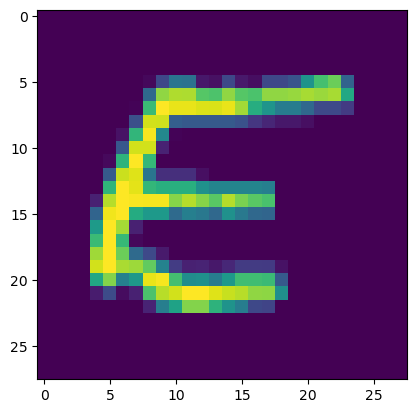

In [38]:
indx=np.random.randint(0, 26026)
print("Randomly Generated index:",indx)
print(f"Label of image at {indx} index:", df.iloc[indx,-1])

img=np.reshape(df.iloc[indx,0:-1], (28,28))
print("Data Type of Image Array:",img.dtype)
print("Image Array:\n",img)

img=img.astype("float")
plt.imshow(img)

[10843  9958 18458 18105 18261  9203 22432  1082 22178]


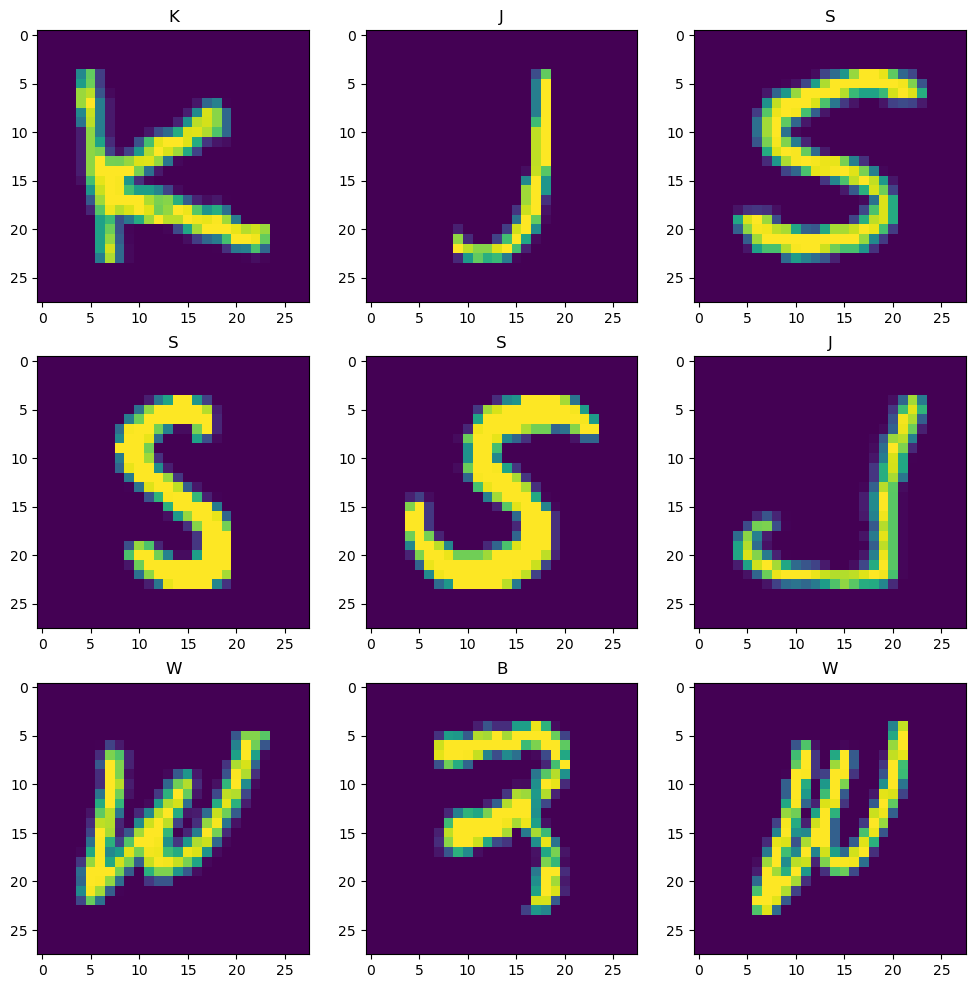

In [39]:
plt.figure(figsize=(12,12))
indx=np.random.randint(1,df.shape[0],9)
print(indx)

for i in range(len(indx)):
    plt.subplot(3,3,i+1)
    label=df.iloc[indx[i],-1]
    plt.title(label)
    img=np.reshape(df.iloc[indx[i], 0:-1], (28,28))
    img=img.astype('float')
    plt.imshow(img)

## SPRINT 2 - Build a model

## Task A - Perform data preprocessing on the given image data and convert it into numerical vectors.
# Step 3 - Segregate Inputs(X) and output(y)

In [40]:
#Define the Predictors(X) and target Variable(y)
X=df.drop(columns=['labels'])
y=df['labels']

## Step 4 - Split the data into Train and Test

In [41]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_train.shape)

(19519, 784) (19519,)
(6507, 784) (19519,)


## Step 5 & 7 - Data Preparation

## Data Preparation on Train data

In [42]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

X_train_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train),
                                   columns=minmax_scaler.get_feature_names_out(),
                                   index=X_train.index)

X_train_transformed.head()


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
18071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Preparation on Test Data

In [43]:
X_test_transformed = pd.DataFrame(minmax_scaler.transform(X_test),
                                  columns=minmax_scaler.get_feature_names_out(),
                                  index=X_test.index)

X_test_transformed.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
6853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Task B - Given an image, build a model that can recognise the character.

## Step 6, 9 & 9 - Training and Testing Phase

### Logistic Regression

In [44]:
import time

In [45]:
%%time 

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_classifier = LogisticRegression()

start_time=time.time()
lr_classifier.fit(X_train_transformed,y_train)
end_time=time.time()
lr_time=end_time-start_time

start_time=time.time()
y_test_predict=lr_classifier.predict(X_test_transformed)
end_time=time.time()
lr_predict_time=end_time-start_time
lr_score=metrics.accuracy_score(y_test,y_test_predict)

print("Model's Accuracy :", lr_score)
print("Training Time :",lr_time)
print("Predicting Time",lr_predict_time)

Model's Accuracy : 0.8347932995235899
Training Time : 12.812644481658936
Predicting Time 0.07422065734863281
CPU times: total: 19.6 s
Wall time: 13.1 s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Naive Baye's

In [46]:
%%time 

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()
start_time=time.time()
nb_classifier.fit(X_train_transformed,y_train)
end_time=time.time()
nb_time=end_time-start_time

start_time=time.time()
y_test_predict=nb_classifier.predict(X_test_transformed)
end_time=time.time()
nb_predict_time=end_time-start_time

nb_score=metrics.accuracy_score(y_test,y_test_predict)

print("Model's Accuracy :", nb_score)
print("Training Time :",nb_time)
print("Predicting Time",nb_predict_time)

Model's Accuracy : 0.702166897187644
Training Time : 0.2698988914489746
Predicting Time 0.04902172088623047
CPU times: total: 328 ms
Wall time: 337 ms


### Decision Tree

In [47]:
%%time 

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt_classifier = DecisionTreeClassifier()
start_time=time.time()
dt_classifier.fit(X_train_transformed,y_train)
end_time=time.time()
dt_time=end_time-start_time

start_time=time.time()
y_test_predict=dt_classifier.predict(X_test_transformed)
end_time=time.time()
dt_predict_time=end_time-start_time

dt_score=metrics.accuracy_score(y_test,y_test_predict)

print("Model's Accuracy :", dt_score)
print("Training Time :",dt_time)
print("Predicting Time",dt_predict_time)

Model's Accuracy : 0.702781619794068
Training Time : 15.925107479095459
Predicting Time 0.03644824028015137
CPU times: total: 10.4 s
Wall time: 16.2 s


## 2. Show me the comparison of various ML models.

In [48]:
data={"Model":["Logistic Regression", "Naive Bayes", "Decision Tree"],
      "Accuracy":[lr_score, nb_score, dt_score],
      "Training Time": [lr_time, nb_time, dt_time],
      "Prediction Time": [lr_predict_time, nb_predict_time, dt_predict_time]}

model_df = pd.DataFrame(data)
model_df

,Model,Accuracy,Training Time,Prediction Time
0,Logistic Regression,0.834793,12.812644,0.074221
1,Naive Bayes,0.702167,0.269899,0.049022
2,Decision Tree,0.702782,15.925107,0.036448


<Axes: xlabel='Model', ylabel='Accuracy'>

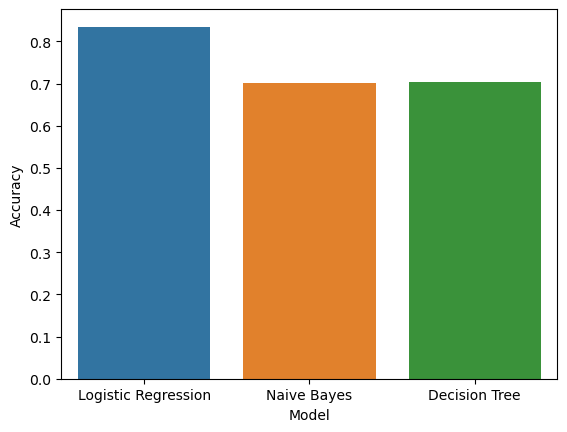

In [49]:
sns.barplot(data=model_df, x='Model', y='Accuracy')

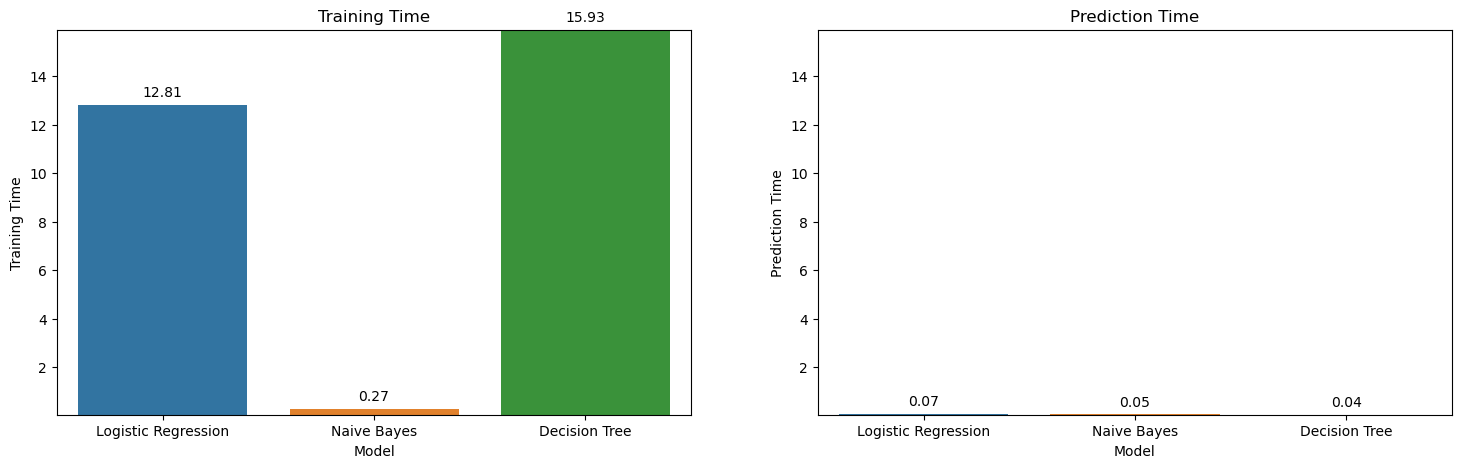

In [50]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

# Training Time
sns.barplot(data=model_df, x="Model", y="Training Time", ax=axs[0])
axs[0].set_title("Training Time")
for p in axs[0].patches:
    axs[0].annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

# Prediction Time
sns.barplot(data=model_df, x="Model", y="Prediction Time", ax=axs[1])
axs[1].set_title("Prediction Time")
for p in axs[1].patches:
    axs[1].annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

# Set the same y-axis scale for both Training Time and Prediction Time
y_min = min(model_df["Training Time"].min(), model_df["Prediction Time"].min())
y_max = max(model_df["Training Time"].max(), model_df["Prediction Time"].max())

axs[0].set_ylim([y_min, y_max])
axs[1].set_ylim([y_min, y_max])

# Show plot
plt.show()

## 3. Model should be light for deployment.
#### Logistic Regression and Naive Baye's are generally light weight

## 4. Model should have very less latency.
#### Naive Bayes is taking less time to predict compared to other models. However, Logistic Regression is providing more accurate results compare to other and also having relatively low latency. Therefore, Logistic Regression model can be used for deployment

 